# Diet recommendation system

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Importing Data

In [ ]:
data = pd.read_csv('/content/recipes.csv')

# Analyzing Data

In [ ]:
data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52457 entries, 0 to 52456
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RecipeId                    52457 non-null  int64  
 1   Name                        52457 non-null  object 
 2   AuthorId                    52457 non-null  int64  
 3   AuthorName                  52457 non-null  object 
 4   CookTime                    42301 non-null  object 
 5   PrepTime                    52457 non-null  object 
 6   TotalTime                   52457 non-null  object 
 7   DatePublished               52457 non-null  object 
 8   Description                 52452 non-null  object 
 9   Images                      52456 non-null  object 
 10  RecipeCategory              52456 non-null  object 
 11  Keywords                    51957 non-null  object 
 12  RecipeIngredientQuantities  52454 non-null  object 
 13  RecipeIngredientParts       524

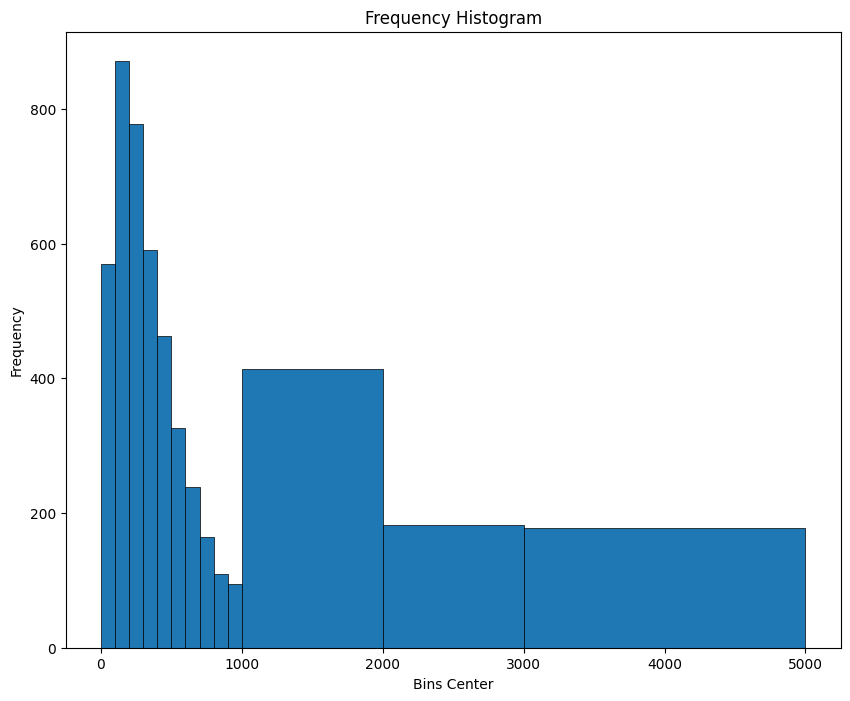

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(data.Calories.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1000,2000,3000,5000],linewidth=0.5, edgecolor="black")
plt.show()

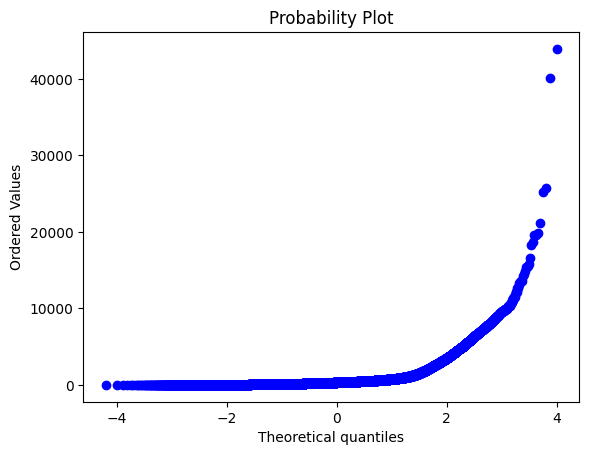

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(data.Calories.to_numpy(), dist="norm", plot=pylab)
pylab.show()

# Preparing the Data

In [ ]:
dataset=data.copy()
columns=['RecipeId','Name','CookTime','PrepTime','TotalTime','RecipeIngredientParts','Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent','RecipeInstructions']
dataset=dataset[columns]

In [ ]:
max_Calories=2000
max_daily_fat=100
max_daily_Saturatedfat=13
max_daily_Cholesterol=300
max_daily_Sodium=2300
max_daily_Carbohydrate=325
max_daily_Fiber=40
max_daily_Sugar=40
max_daily_Protein=200
max_list=[max_Calories,max_daily_fat,max_daily_Saturatedfat,max_daily_Cholesterol,max_daily_Sodium,max_daily_Carbohydrate,max_daily_Fiber,max_daily_Sugar,max_daily_Protein]

In [ ]:
extracted_data=dataset.copy()
for column,maximum in zip(extracted_data.columns[6:15],max_list):
    extracted_data=extracted_data[extracted_data[column]<maximum]

In [ ]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35918 entries, 0 to 52455
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecipeId               35918 non-null  int64  
 1   Name                   35918 non-null  object 
 2   CookTime               29001 non-null  object 
 3   PrepTime               35918 non-null  object 
 4   TotalTime              35918 non-null  object 
 5   RecipeIngredientParts  35918 non-null  object 
 6   Calories               35918 non-null  float64
 7   FatContent             35918 non-null  float64
 8   SaturatedFatContent    35918 non-null  float64
 9   CholesterolContent     35918 non-null  float64
 10  SodiumContent          35918 non-null  float64
 11  CarbohydrateContent    35918 non-null  float64
 12  FiberContent           35918 non-null  float64
 13  SugarContent           35918 non-null  float64
 14  ProteinContent         35918 non-null  float64
 15  RecipeI

In [ ]:
extracted_data.iloc[:,6:15].corr()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
Calories,1.000000,0.759025,0.602068,0.480728,0.497768,0.717122,0.454455,0.194666,0.679327
FatContent,0.759025,1.000000,0.774741,0.447208,0.384957,0.213254,0.185916,0.051158,0.467648
SaturatedFatContent,0.602068,0.774741,1.000000,0.522737,0.336708,0.165949,0.048854,0.075837,0.400400
CholesterolContent,0.480728,0.447208,0.522737,1.000000,0.341548,0.059344,-0.050568,-0.046569,0.690463
SodiumContent,0.497768,0.384957,0.336708,0.341548,1.000000,0.282658,0.253211,-0.042711,0.494970
CarbohydrateContent,0.717122,0.213254,0.165949,0.059344,0.282658,1.000000,0.577315,0.398186,0.236345
FiberContent,0.454455,0.185916,0.048854,-0.050568,0.253211,0.577315,1.000000,0.089559,0.243015
SugarContent,0.194666,0.051158,0.075837,-0.046569,-0.042711,0.398186,0.089559,1.000000,-0.121702
ProteinContent,0.679327,0.467648,0.400400,0.690463,0.494970,0.236345,0.243015,-0.121702,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(extracted_data.iloc[:,6:15].to_numpy())

In [ ]:
prep_data

array([[-0.50050813, -0.87528566, -0.76662475, ...,  0.23301169,
         2.27929755, -0.66197824],
       [ 1.50025632,  1.17998754, -0.05763872, ...,  4.21268629,
         2.48191498,  1.28248079],
       [-0.86921418, -1.07603328, -1.10693805, ...,  0.58159632,
         0.94628811, -0.58002786],
       ...,
       [ 1.16168227,  0.50126941, -0.14271704, ..., -0.02842679,
         2.23664125,  1.86358349],
       [-0.09345227,  0.3961159 ,  0.99166061, ..., -0.72559606,
        -0.2267602 ,  0.32142633],
       [-0.55967641, -0.71277569, -0.90842196, ..., -0.49320631,
         0.44507656, -0.70667845]])

# Trainning the model

## Fitting the model

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [ ]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

In [ ]:
pipeline.transform(extracted_data.iloc[0:1,6:15].to_numpy())[0]

array([    0, 19679, 26112,  1362, 28669, 28131,  3409, 19963, 10838,
        1922])

## Testing the model

In [ ]:
extracted_data.iloc[pipeline.transform(extracted_data.iloc[0:1,6:15].to_numpy())[0]]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
28595,32172,L & B's Concoction,PT5M,PT5M,PT10M,"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"c(""Blend the frozen strawberries, ice cubes, y..."
37917,41682,Cheesy Apple Pie in a Glass,PT30M,PT25M,PT55M,"c(""Red Delicious apples"", ""brown sugar"", ""rais...",167.3,0.4,0.1,0.0,9.2,42.3,3.7,35.4,0.6,"c(""Combine first 6 ingredients and 1/4 tsp all..."
2231,3741,Whole-Berry Cranberry Sauce,PT15M,PT5M,PT20M,"c(""fresh cranberries"", ""water"", ""sugar"")",165.7,0.1,0.0,0.0,3.1,43.1,3.7,36.5,0.3,"c(""Combine all ingredients in a medium saucepa..."
41757,45633,Chunky Applesauce,PT8H,PT10M,PT8H10M,"c(""apples"", ""water"", ""sugar"", ""cinnamon"")",159.1,0.3,0.1,0.0,2.4,41.8,4.4,35.5,0.5,"c(""Put all ingredients in crockpot."", ""Cover a..."
40954,44796,Banana Bonkers,NaN,PT20M,PT20M,"c(""bananas"", ""grapefruit juice"")",171.7,1.3,0.7,0.0,25.3,39.8,3.3,30.4,1.8,"c(""Puree bananas in a blender or food processo..."
5505,8474,Roasted Rosemary Skewered Figs,PT45M,PT10M,PT55M,"c(""fresh figs"", ""fresh rosemary"", ""maple syrup...",164.9,0.6,0.1,0.0,3.5,42.3,4.4,36.3,1.2,"c(""preheat oven to 400 degrees. Skewer 3 whole..."
28996,32581,Easy Baked Apples,PT8M,PT8M,PT16M,"c(""raisins"", ""coconut"", ""tart apples"", ""cinnam...",165.4,1.8,0.2,0.0,23.8,39.4,3.9,31.6,1.0,"c(""Combine nuts, raisins, and coconut."", ""Core..."
16010,19336,Sparkling Raspberry Lemonade,PT3M,PT35M,PT38M,"c(""frozen unsweetened raspberries"", ""sugar"", ""...",169.6,0.4,0.0,0.0,12.3,43.9,4.0,36.9,0.9,"c(""Combine frozen raspberries, sugar and 1/2 c..."
3221,4929,Cranberry Orange &amp; Port Sauce,PT20M,PT10M,PT30M,"c(""cranberries"", ""oranges"", ""sugar"", ""port wine"")",185.3,0.1,0.0,0.0,3.5,40.6,3.7,33.4,0.7,"c(""Place the cranberries and the zest and juic..."


In [ ]:
extracted_data[extracted_data['RecipeIngredientParts'].str.contains("egg",regex=False)]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
12,50,Biscotti Di Prato,PT50M,PT20M,PT1H10M,"c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",89.4,2.6,0.3,16.6,23.5,14.5,0.8,7.3,2.3,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo..."
18,56,Buttermilk Pie,PT1H,PT20M,PT1H20M,"c(""butter"", ""margarine"", ""sugar"", ""flour"", ""eg...",395.9,19.1,9.8,101.5,269.8,52.2,0.7,39.9,5.0,"c(""Preheat oven to 400°F."", ""Beat the butter a..."
22,60,Blueberry Dessert,NaN,PT35M,PT35M,"c(""Bisquick baking mix"", ""sugar"", ""butter"", ""m...",381.1,17.3,8.8,62.1,437.6,54.5,1.6,36.9,3.9,"c(""Heat oven to 400 degrees."", ""Mix 2 cups bak..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52437,56593,Strawberry Cinnamon Muffins,PT25M,PT20M,PT45M,"c(""eggs"", ""sugar"", ""milk"", ""plain yogurt"", ""va...",182.4,5.5,3.1,47.5,186.1,29.6,1.0,12.4,3.9,"c(""In a mixing bowl, whisk the eggs and sugar ..."
52438,56594,Sun-Dried Tomato Palmiers,PT20M,PT15M,PT35M,"c(""garlic cloves"", ""pesto sauce"", ""frozen puff...",76.6,5.3,1.7,3.8,72.3,5.5,0.2,0.4,1.9,"c(""Preheat the oven to 350 degrees F."", ""Stir ..."
52441,56597,Kasha and Mushrooms,PT10M,PT45M,PT55M,"c(""onion"", ""vegetable broth"", ""egg"", ""dried ka...",140.9,11.7,1.8,52.9,524.6,5.7,1.2,2.6,4.9,"c(""In a medium skillet, heat 1 tablespoon oil ..."
52451,56607,Greek Doughnuts (Svinghi ),PT30M,PT20M,PT50M,"c(""olive oil"", ""butter"", ""water"", ""salt"", ""sug...",238.4,6.4,3.6,60.0,161.4,43.6,0.3,35.5,2.7,"c(""Place butter in a small saucepan."", ""Add wa..."


# Creating an end to end function

In [ ]:
def scaling(dataframe):
    scaler=StandardScaler()
    prep_data=scaler.fit_transform(dataframe.iloc[:,6:15].to_numpy())
    return prep_data,scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

def extract_data(dataframe,ingredient_filter,max_nutritional_values):
    extracted_data=dataframe.copy()
    for column,maximum in zip(extracted_data.columns[6:15],max_nutritional_values):
        extracted_data=extracted_data[extracted_data[column]<maximum]
    if ingredient_filter!=None:
        for ingredient in ingredient_filter:
            extracted_data=extracted_data[extracted_data['RecipeIngredientParts'].str.contains(ingredient,regex=False)]
    return extracted_data

def apply_pipeline(pipeline,_input,extracted_data):
    return extracted_data.iloc[pipeline.transform(_input)[0]]

def recommend(dataframe,_input,max_nutritional_values,ingredient_filter=None,params={'return_distance':False}):
    extracted_data=extract_data(dataframe,ingredient_filter,max_nutritional_values)
    prep_data,scaler=scaling(extracted_data)
    neigh=nn_predictor(prep_data)
    pipeline=build_pipeline(neigh,scaler,params)
    return apply_pipeline(pipeline,_input,extracted_data)


In [ ]:
test_input=extracted_data.iloc[0:1,6:15].to_numpy()
recommend(dataset,test_input,max_list)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
28595,32172,L & B's Concoction,PT5M,PT5M,PT10M,"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"c(""Blend the frozen strawberries, ice cubes, y..."
37917,41682,Cheesy Apple Pie in a Glass,PT30M,PT25M,PT55M,"c(""Red Delicious apples"", ""brown sugar"", ""rais...",167.3,0.4,0.1,0.0,9.2,42.3,3.7,35.4,0.6,"c(""Combine first 6 ingredients and 1/4 tsp all..."
2231,3741,Whole-Berry Cranberry Sauce,PT15M,PT5M,PT20M,"c(""fresh cranberries"", ""water"", ""sugar"")",165.7,0.1,0.0,0.0,3.1,43.1,3.7,36.5,0.3,"c(""Combine all ingredients in a medium saucepa..."
41757,45633,Chunky Applesauce,PT8H,PT10M,PT8H10M,"c(""apples"", ""water"", ""sugar"", ""cinnamon"")",159.1,0.3,0.1,0.0,2.4,41.8,4.4,35.5,0.5,"c(""Put all ingredients in crockpot."", ""Cover a..."


In [1]:
data.head()

NameError: name 'data' is not defined